## Making the necessary Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import seaborn as sns


## Load the Boston Housing DataSet

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
type(boston_data)

sklearn.utils.Bunch

In [7]:
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston_df=pd.DataFrame(data=np.c_[boston_data['data'],boston_data['target']])

In [5]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Preparing the Data Frame

In [3]:
boston_data.feature_names

boston_df=pd.DataFrame(data=np.c_[boston_data['data'],boston_data['target']])

column_names = boston_data['feature_names']

column_names = np.insert(column_names, len(column_names), 'Price')

column_names

boston_df.columns = column_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Prepare independent and dependent variables

In [5]:
X = pd.DataFrame(boston_data.data)
X.columns = boston_data.feature_names

y = boston_data.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
  
print("X_train shape : ", X_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

X_train shape :  (354, 13)
X_test shape  :  (152, 13)
y_train shape :  (354,)
y_test shape  :  (152,)


## Linear Regression without any Pre-processing

In [7]:
# Fitting Multi Linear regression model to training model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(X_test)

print("y_train shape : ", y_train.shape)
print("y_pred shape : ", y_pred.shape)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

print('Regressor Score: ',regressor.score(X_test, y_test))

y_train shape :  (354,)
y_pred shape :  (152,)
Mean Squared Error:  27.195965766883234
Regressor Score:  0.6733825506400193


## Perform correlation to identify significant variables and display on a Seaborn HeatMap

In [8]:
boston_corr = boston_df.corr()

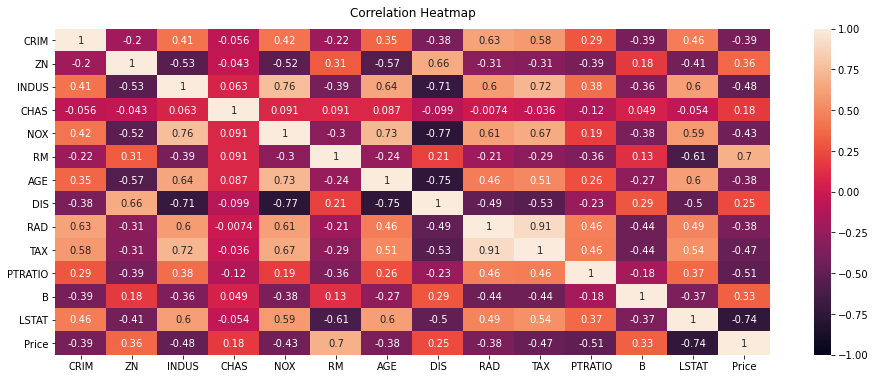

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(boston_corr,vmin=-1,vmax=1,annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

[Text(0, 0.5, 'Price'),
 Text(0, 1.5, 'RM'),
 Text(0, 2.5, 'ZN'),
 Text(0, 3.5, 'B'),
 Text(0, 4.5, 'DIS'),
 Text(0, 5.5, 'CHAS'),
 Text(0, 6.5, 'AGE'),
 Text(0, 7.5, 'RAD'),
 Text(0, 8.5, 'CRIM'),
 Text(0, 9.5, 'NOX'),
 Text(0, 10.5, 'TAX'),
 Text(0, 11.5, 'INDUS'),
 Text(0, 12.5, 'PTRATIO'),
 Text(0, 13.5, 'LSTAT')]

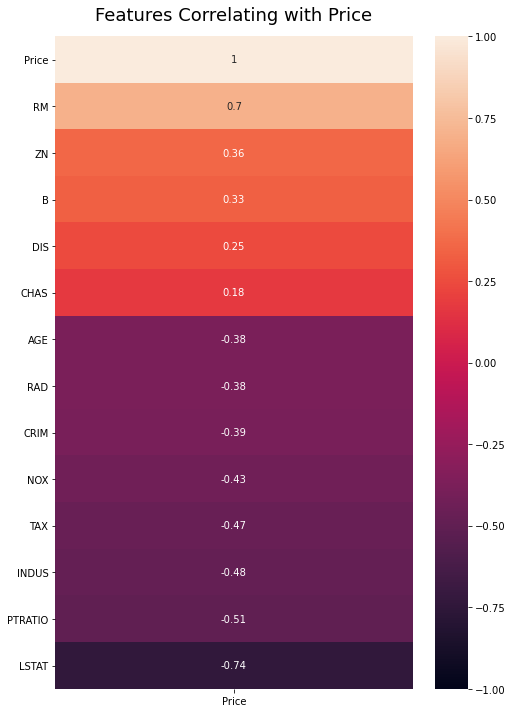

In [10]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(boston_corr[['Price']].sort_values(by='Price',ascending=False),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
heatmap.set_yticklabels(heatmap.get_yticklabels(),rotation=360)

## Retain significant variables RM and LSTAT for further modeling

In [11]:
features_to_retain = ['RM','LSTAT','Price']

X = pd.DataFrame(boston_df[['RM','LSTAT']])

y = boston_df['Price']

## Scale the data

In [12]:
X = scale(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,
                                                    random_state = 0)
  
print("X_train shape : ", X_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

X_train shape :  (354, 2)
X_test shape  :  (152, 2)
y_train shape :  (354,)
y_test shape  :  (152,)


## Perform Linear regression on significant features and scaled data

In [14]:
# Fitting Multi Linear regression model to training model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(X_test)

print("y_train shape : ", y_test.shape)
print("y_pred shape : ", y_pred.shape)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

print('Regressor Score: ',regressor.score(X_test, y_test))

y_train shape :  (152,)
y_pred shape :  (152,)
Mean Squared Error:  32.72507169281495
Regressor Score:  0.6069792285352372


## Define a score function with Cross Validation

In [15]:
def get_cv_score(model,folds):
    scores=cross_val_score(model,X_train,y_train,cv=folds,scoring='r2')
    print('CV Mean:', np.mean(scores))
    print('STD:', np.std(scores))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,random_state = 0)
  
print("X_train shape : ", X_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

X_train shape :  (354, 2)
X_test shape  :  (152, 2)
y_train shape :  (354,)
y_test shape  :  (152,)


## Identify number of folds for best model performance

In [17]:
cross_val_df=pd.DataFrame(columns=['CV_Score'])
for i in range(2,20):
    cvscores = cross_val_score(regressor,X,y,cv=i)
    cross_val_df.loc[i] = np.mean(cvscores)

cross_val_df.reset_index(level=0, inplace=True)

cross_val_df.columns=['Num_Folds','CV_Score']

cross_val_df.sort_values(by='CV_Score',ascending=False).iloc[0]

Num_Folds    2.000000
CV_Score     0.477497
Name: 0, dtype: float64

## Identify score for New model with pre-processed data and Cross Validation applied

In [18]:
get_cv_score(regressor,2)

CV Mean: 0.6407377769167266
STD: 0.00995922920274861


## Apply Lasso Regularization

In [19]:
lasso_df=pd.DataFrame(columns=['Alpha','CV_Score'])
scores=[]
for i in range(1,1000):
    lassoModel = Lasso(alpha = i * 0.003, tol = 0.0925)
    lassoModel.fit(X_train,y_train)
    scores = cross_val_score(lassoModel,X,y,cv=10)
    avg_score = np.mean(scores)
    lasso_df.loc[i-1] = [i* 0.003,avg_score*100]

print(lasso_df.sort_values(by='CV_Score',ascending=False).iloc[0])

lassoModelChosen = Lasso(alpha=1.047,tol=0.0925)
lassoModelChosen.fit(X_train,y_train)
print(lassoModelChosen.score(X_test,y_test))

Alpha       1.047000
CV_Score    1.603732
Name: 348, dtype: float64
0.6008299857739274


In [20]:
for i in range(2,11):
    get_cv_score(lassoModelChosen,i)

CV Mean: 0.6264960064875592
STD: 0.013095646722784626
CV Mean: 0.6088238955636821
STD: 0.05004616240289338
CV Mean: 0.6246823048554725
STD: 0.060922401041649706
CV Mean: 0.6207945411467062
STD: 0.0750776781721289
CV Mean: 0.5914375217191248
STD: 0.13506182021554644
CV Mean: 0.6130171852423698
STD: 0.09275252780838888
CV Mean: 0.6130186709002755
STD: 0.07465218904630914
CV Mean: 0.6034555713632481
STD: 0.14207525296896398
CV Mean: 0.6056019249694413
STD: 0.10179567870436226


## Find the optimal alpha with grid search and identify the best score

In [21]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lassoModelChosen, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6306491581210452
Best Params:  {'alpha': 0.001}


In [22]:
alpha = list(np.linspace(0,.1,100))
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lassoModelChosen, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:  0.6306660510100729
Best Params:  {'alpha': 0.0}


C:\Users\Akhil_S_Bhat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Akhil_S_Bhat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Akhil_S_Bhat\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5236.9981202116505, tolerance: 2775.613993573446
  model = cd_fast.enet_coordinate_descent(


## Apply Ridge Regression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)
  
print("X_train shape : ", X_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape  : ", y_test.shape)

X_train shape :  (354, 2)
X_test shape  :  (152, 2)
y_train shape :  (354,)
y_test shape  :  (152,)


In [24]:
ridge_df=pd.DataFrame(columns=['Alpha','CV_Score'])
for i in range(1,1000):
    ridgeModel = Ridge(alpha = i * 0.003)
    ridgeModel.fit(X_train,y_train)
    scores = cross_val_score(ridgeModel,X,y)
    avg_cross_val_score = np.mean(scores)
    ridge_df.loc[i-1] = [i* 0.003,avg_cross_val_score*100]

ridge_df.sort_values(by='CV_Score',ascending=False).iloc[0]

ridgeModelChosen = Ridge(alpha=2.997)
ridgeModelChosen.fit(X_train,y_train)
print(ridgeModelChosen.score(X_test,y_test))

0.6072654388825494


In [25]:
for i in range(2,11):
    get_cv_score(ridgeModelChosen,i)

CV Mean: 0.6408847064168903
STD: 0.008272706528271723
CV Mean: 0.6225651673071623
STD: 0.06280077348414334
CV Mean: 0.6384077829447994
STD: 0.06746023259663742
CV Mean: 0.6309960163576
STD: 0.10533033102000784
CV Mean: 0.601217155515762
STD: 0.1587792006648835
CV Mean: 0.6223886046654498
STD: 0.11761047454988481
CV Mean: 0.6226867458761481
STD: 0.08860445350977088
CV Mean: 0.6126530782768503
STD: 0.17073066815547583
CV Mean: 0.6124914258508676
STD: 0.131519332521023


## Find the optimal alpha with grid search and identify the best score

In [26]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridgeModelChosen, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.6315064716085635
Best Params:  {'alpha': 10}


In [27]:
alpha = list(np.linspace(0,1,100))
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridgeModelChosen, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:  0.6307839330565718
Best Params:  {'alpha': 1.0}
